<a href="https://colab.research.google.com/github/cfreeman22/d212_data_mining_2/blob/main/D212_kmeans1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA Mining 2 TASK 1 Clustering

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

# to scale the data using z-score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
def treat_outliers(df, col):
    """
    Treats outliers in a variable
    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables
    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [3]:
#reading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading the data from my google drive.
df = pd.read_csv('/content/drive/My Drive/churn_clean.csv')

## Data Preeparation steps

In [5]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
#Checking for null
df.isnull().values.any()

False

In [8]:
# Dropping unnecessary columns
cols_to_drop =['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Zip', 'Lat', 'Lng', 'TimeZone','City', 'State', 'County','Job','Population']

# Dropping unnecessary columns
df = df.drop(cols_to_drop, axis = 1)

# renaming the survey items columns
df = df.rename(columns={'Item1': 'TimelyResponse','Item2': 'TimelyFixes' , 'Item3': 'TimelyReplacements', 'Item4': 'Reliability',

                          'Item5': 'Options', 'Item6': 'RespectfulResponse', 'Item7': 'CourteousExchange', 'Item8': 'ActiveListening'})

# Checking to confirm if unnecessary columns were dropped and survey columns renamed appropriately

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  10000 non-null  object 
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Income                10000 non-null  float64
 4   Marital               10000 non-null  object 
 5   Gender                10000 non-null  object 
 6   Churn                 10000 non-null  object 
 7   Outage_sec_perweek    10000 non-null  float64
 8   Email                 10000 non-null  int64  
 9   Contacts              10000 non-null  int64  
 10  Yearly_equip_failure  10000 non-null  int64  
 11  Techie                10000 non-null  object 
 12  Contract              10000 non-null  object 
 13  Port_modem            10000 non-null  object 
 14  Tablet                10000 non-null  object 
 15  InternetService     

In [9]:
## DROP EITHER TENURE OR BANDWIDTH from previous analysis these two features were highly correlated
#df = df.drop('Bandwidth_GB_Year', axis = 1)

In [10]:
# Dropping unnecessary categorical columns ...........
cols_to_drop2 =['Area', 'Marital', 'Gender', 'PaymentMethod', 'InternetService', 'Contract','Bandwidth_GB_Year','Churn',
 'Techie','Port_modem','Tablet', 'Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
 'StreamingTV','StreamingMovies','PaperlessBilling']

# Dropping unnecessary columns
df = df.drop(cols_to_drop2, axis = 1)

In [11]:
df_attr=df.iloc[:,1:]
df_scaled=df_attr.apply(zscore)
#sns.pairplot(df_scaled,diag_kind='kde')

## Group Data into similar clusters
Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

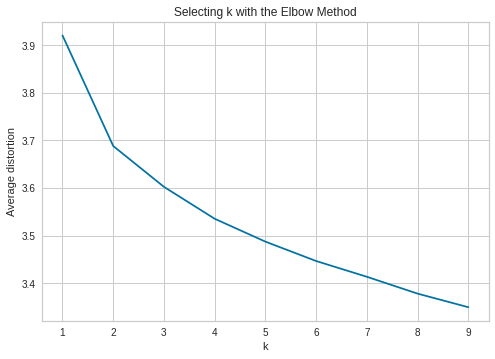

In [12]:
 #Finding optimal no. of clusters
#from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction=model.predict(df_scaled)
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

In [13]:
# Let us first start with K = 3
final_model=KMeans(2)
final_model.fit(df_scaled)
prediction=final_model.predict(df_scaled)

#Append the prediction 
df["GROUP"] = prediction
df_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening,GROUP
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,5,5,5,3,4,4,3,4,0
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,3,4,3,3,4,3,4,4,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,4,4,2,4,4,3,3,3,1
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,4,4,4,2,5,4,3,3,1
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,4,4,4,3,4,4,4,5,0


In [14]:
df_clust = df.groupby(['GROUP'])
df_clust.mean()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening
GROUP,,,,,,,,,,,,,,,,,
0,2.098015,53.138735,39900.522308,9.927973,12.040106,0.994271,0.392061,34.007450,173.490901,4.169634,4.143646,4.073256,3.707182,3.238183,4.079394,4.020462,3.938408
1,2.077841,53.020731,39717.468255,10.072458,11.992959,0.994133,0.403677,35.021997,171.797013,2.841971,2.894778,2.926658,3.297086,3.736358,2.940935,3.021123,3.072365


array([[<Axes: title={'center': 'ActiveListening'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Age'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Contacts'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'CourteousExchange'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Email'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Income'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'MonthlyCharge'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Options'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Outage_sec_perweek'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'Reliability'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'RespectfulResponse'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Tenure'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'TimelyFixes'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'TimelyReplacements'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'TimelyResponse'}, xlabel='

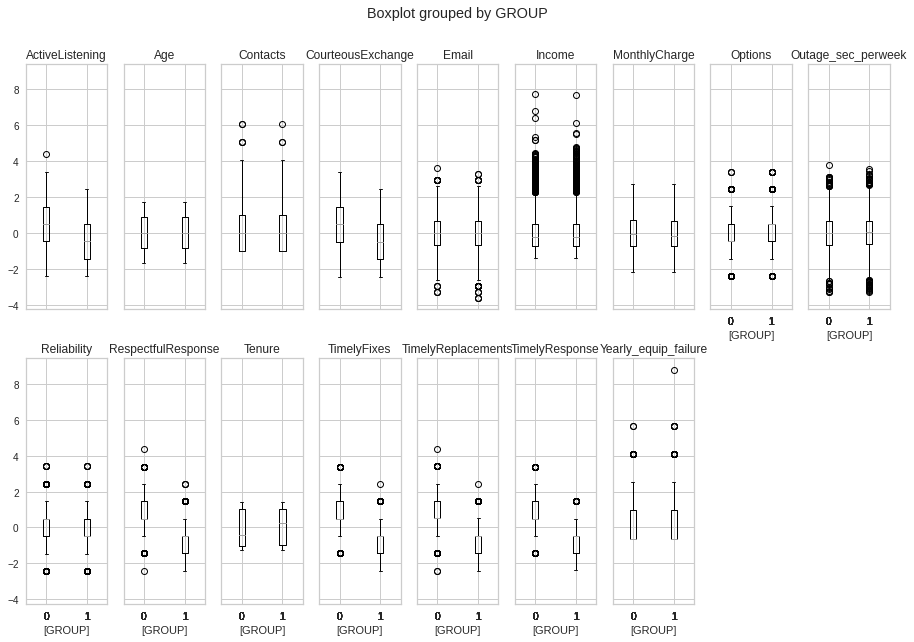

In [15]:
df_scaled.boxplot(by='GROUP', layout = (2,9),figsize=(15,10))

In [16]:
# Let us first start with K = 3
final_model=KMeans(4)
final_model.fit(df_scaled)
prediction=final_model.predict(df_scaled)

#Append the prediction 
df["GROUP"] = prediction
df_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening,GROUP
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,5,5,5,3,4,4,3,4,3
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,3,4,3,3,4,3,4,4,0
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,4,4,2,4,4,3,3,3,0
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,4,4,4,2,5,4,3,3,3
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,4,4,4,3,4,4,4,5,3


In [17]:
df_clust2 = df.groupby(['GROUP'])
df_clust2.mean()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening
GROUP,,,,,,,,,,,,,,,,,
0,2.117739,53.301805,40034.557955,9.892933,11.795133,0.958791,0.460361,37.183657,173.432768,3.124411,3.177786,3.220565,2.685636,4.349686,2.734694,2.805730,2.940738
1,2.038612,52.743370,39410.466572,10.248974,12.188378,1.028861,0.347504,32.880821,170.191685,2.560842,2.613105,2.634165,3.905226,3.126365,3.145476,3.235179,3.203198
2,2.123660,54.606348,39630.482815,9.872756,11.804617,0.967024,0.410965,33.557033,174.814924,3.880049,3.842127,3.772877,4.303380,2.622424,4.260099,4.202803,4.095218
3,2.072299,51.690496,40158.093599,9.984407,12.273355,1.021527,0.373274,34.444409,172.164494,4.454915,4.440699,4.369212,3.119009,3.845654,3.901300,3.840374,3.783509


array([[<Axes: title={'center': 'ActiveListening'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Age'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Contacts'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'CourteousExchange'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Email'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Income'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'MonthlyCharge'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Options'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Outage_sec_perweek'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'Reliability'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'RespectfulResponse'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Tenure'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'TimelyFixes'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'TimelyReplacements'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'TimelyResponse'}, xlabel='

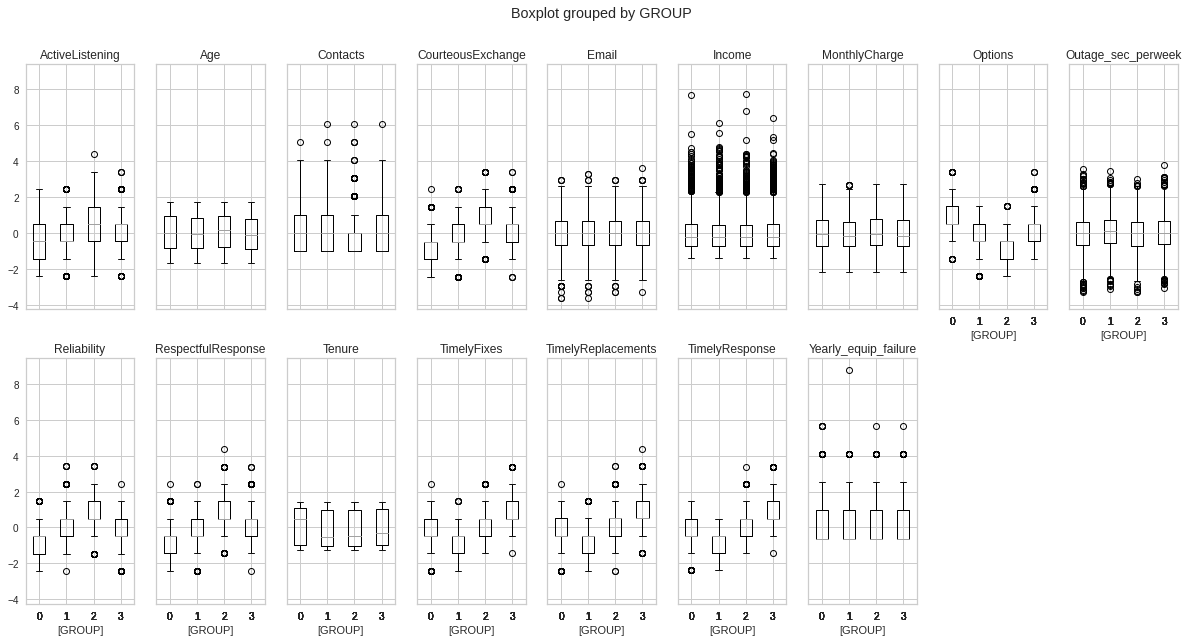

In [18]:
df_scaled.boxplot(by='GROUP', layout = (2,9),figsize=(20,10))

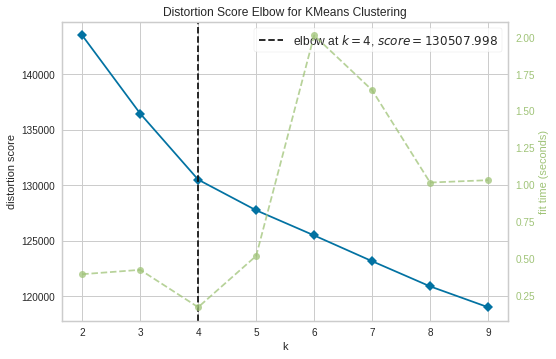

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(df_scaled)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

In [20]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((df))
    score = silhouette_score(df_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.050500378103266304)
For n_clusters = 3, the silhouette score is 0.02138747234871147)
For n_clusters = 4, the silhouette score is 0.013270243655654532)
For n_clusters = 5, the silhouette score is 0.007250297533530656)
For n_clusters = 6, the silhouette score is 0.005519679455003168)
For n_clusters = 7, the silhouette score is 0.002863607408375827)
For n_clusters = 8, the silhouette score is 0.0016465318545188915)
For n_clusters = 9, the silhouette score is 0.00019883581371614182)


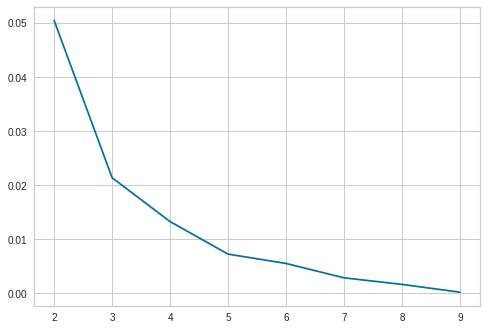

In [21]:
plt.plot(cluster_list, sil_score)
plt.show()

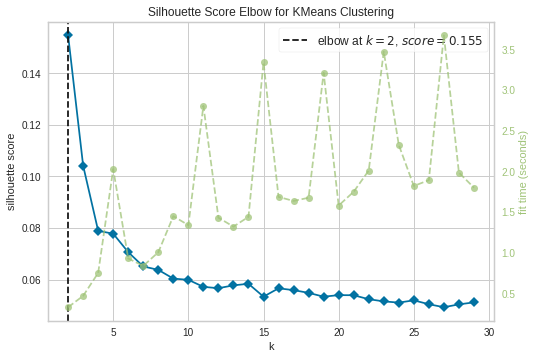

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [22]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 30), metric="silhouette", timings=True)
visualizer.fit(df_scaled)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

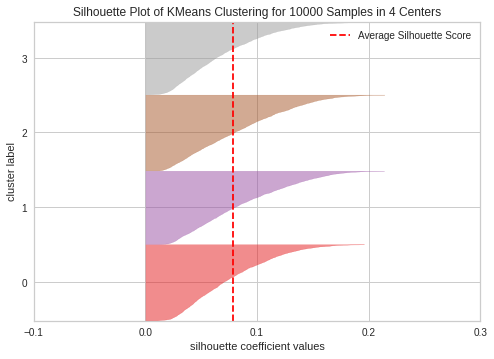

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(df_scaled)
visualizer.show()